In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_root = 'pre_generated_data'
constellation = 'starlink'
ground_station = 'top10'

In [3]:
inputs_file_path = os.path.join(data_root, f'inputs_{constellation}_{ground_station}_gs.json')
record_folder = os.path.join(data_root, f'records_{constellation}_{ground_station}_gs')

In [4]:
fig_root_folder = 'figs'
fig_folder = os.path.join(fig_root_folder, constellation, ground_station)
os.makedirs(fig_folder, exist_ok=True)

In [5]:
# read inputs to get b_sequence and timepoint_location_volume_dict
with open(inputs_file_path, 'r') as f:
    inputs = json.load(f)
b_sequence = inputs['b_sequence']
print(f'b_sequence: {b_sequence}')
timepoint_location_volume_dict = inputs['timepoint_location_volume_dict']
print(f'timepoint_location_volume_dict: {timepoint_location_volume_dict}')

b_sequence: [0, 69, 125, 12, 138, 43, 0, 26, 9, 0, 9, 17, 18, 64, 22, 26, 83, 33, 43, 12, 0, 13, 9, 0, 35, 62, 26, 13, 131, 22, 41, 0, 13, 0, 17, 20, 22, 0, 166, 87, 45, 0, 13, 0, 0, 36, 17, 20, 0, 43, 22, 16, 0, 69, 0, 9, 0, 18, 34, 0, 92, 22, 11, 0, 34, 0, 0, 0, 9, 34, 0, 166, 87, 22, 8, 0, 0, 0, 18, 0, 27, 34, 0, 46, 22, 5, 0, 36, 9, 0, 9, 0, 27, 43, 0, 46, 33, 8, 0, 34, 10, 9, 0, 6, 34, 0, 208, 46, 8, 0, 36, 10, 9, 0, 24, 0, 208, 92, 13, 0, 72, 10, 13, 9, 0, 37, 43, 0, 1111, 46, 11, 0, 138, 20, 0, 24, 0, 416, 0, 13, 29, 0, 138, 10, 13, 0, 0, 43, 0, 416, 98, 17, 44, 0, 72, 10, 13, 0, 0, 43, 15, 555, 92, 15, 37, 0, 69, 13, 10, 18, 0, 30, 15, 833, 46, 13, 44, 0, 69, 26, 10, 13, 0, 0, 30, 30, 625, 46, 11, 22, 0, 104, 13, 10, 9, 0, 9, 17, 45, 555, 92, 0, 0, 104, 13, 10, 0, 20, 13, 30, 416, 46, 8, 0, 0, 20, 4, 0, 20, 13, 14, 46, 0, 14, 37, 0, 9, 13, 0, 20, 22, 0, 416, 0, 0, 14, 18, 0, 10, 13, 0, 42, 13, 0, 0, 19, 18, 34, 0, 13, 0, 41, 13, 10, 0, 0, 37, 0, 0, 8, 42, 13, 0, 8, 0, 38, 55, 0

In [6]:
# read the task important timepoints file to get the important timepoints


In [7]:
# from timepoint_location_volume_dict, get time step in simulation by removing timepoint without volume
time_step = 0
time_step_location_volume_dict = {}
for timepoint in timepoint_location_volume_dict:
    if len(timepoint_location_volume_dict[timepoint]) > 0:
        time_step += 1
        time_step_location_volume_dict[timepoint] = timepoint_location_volume_dict[timepoint]

print(f'time_step_location_volume_dict: {time_step_location_volume_dict}')


time_step_location_volume_dict: {'0': {'0566E-1185N': 100}, '1': {'1014E-1375N': 100, '1049E-1370N': 100, '1172E-1306N': 100}, '2': {'1296E-1198N': 100}, '3': {'0487E-1246N': 100}, '4': {'1138E-1216N': 100}, '5': {'1209E-1113N': 100, '0387E-1276N': 100}, '6': {'0361E-1300N': 100, '0387E-1276N': 100}, '7': {'1690E-1211N': 100, '1703E-1219N': 100}, '8': {'1481E-1119N': 100}, '9': {'1209E-1113N': 100}, '10': {'1015E-1062N': 100, '1138E-1216N': 100}, '11': {'1298E-1322N': 100}, '12': {'0760E-0887N': 100, '0924E-1108N': 100, '0977E-1187N': 100}, '13': {'1690E-1211N': 100, '0632E-0892N': 100, '1049E-1370N': 100, '1848E-0793N': 100, '1025E-1366N': 100}, '14': {'1481E-1119N': 100, '0566E-1185N': 100}, '15': {'1025E-1366N': 100, '1172E-1306N': 100}, '16': {'1289E-1169N': 100, '0487E-1246N': 100}, '17': {'1138E-1216N': 100}, '18': {'1209E-1113N': 100, '0368E-1245N': 100, '0387E-1276N': 100, '1185E-0935N': 100}, '19': {'0544E-1228N': 100}, '20': {'0361E-1300N': 100, '0387E-1276N': 100, '0434E-121

In [8]:
# get the timepoint when each location first appears
location_first_appear_timepoint_dict = {}
for timepoint in time_step_location_volume_dict:
    for location in time_step_location_volume_dict[timepoint]:
        if location not in location_first_appear_timepoint_dict:
            location_first_appear_timepoint_dict[location] = timepoint
print(f'location_first_appear_timepoint_dict: {location_first_appear_timepoint_dict}')

location_first_appear_timepoint_dict: {'0566E-1185N': '0', '1014E-1375N': '1', '1049E-1370N': '1', '1172E-1306N': '1', '1296E-1198N': '2', '0487E-1246N': '3', '1138E-1216N': '4', '1209E-1113N': '5', '0387E-1276N': '5', '0361E-1300N': '6', '1690E-1211N': '7', '1703E-1219N': '7', '1481E-1119N': '8', '1015E-1062N': '10', '1298E-1322N': '11', '0760E-0887N': '12', '0924E-1108N': '12', '0977E-1187N': '12', '0632E-0892N': '13', '1848E-0793N': '13', '1025E-1366N': '13', '1289E-1169N': '16', '0368E-1245N': '18', '1185E-0935N': '18', '0544E-1228N': '19', '0434E-1218N': '20', '1748E-1247N': '45', '0331E-1257N': '50', '0614E-0946N': '53', '1335E-1166N': '54', '0683E-1006N': '56', '1439E-1134N': '58', '1438E-1134N': '69', '0577E-1243N': '70', '1538E-1163N': '92', '0595E-1278N': '108', '1276E-1107N': '111', '1669E-1160N': '113', '0571E-1075N': '114', '0457E-1135N': '120', '1617E-1207N': '120', '1204E-1202N': '122', '1615E-1206N': '132', '1669E-1153N': '134', '1210E-1025N': '138', '1200E-0847N': '138

In [9]:
re_allocation_algorithm = re.compile(r'.*_(.*)_.*.json')
re_seed = re.compile(r'.*_.*_(.*).json')

In [10]:
# get all json files that start with 'downlink_records_'
downlink_record_filename_list = [f for f in os.listdir(record_folder) if 'downlink_records_' in f and f.endswith('.json')]
print(f'downlink_record_filename_list: {downlink_record_filename_list}')

downlink_record_filename_list: ['downlink_records_MPCAllocator_0.json', 'downlink_records_AccAllocator_0.json', 'downlink_records_RandomAllocator_0.json', 'downlink_records_Datallocator_0.json']


In [11]:
# get all json files start with 'utility_'
utility_filename_list = [f for f in os.listdir(record_folder) if f.startswith('utility_') and f.endswith('.json')]
print(f'utility_filename_list: {utility_filename_list}')

utility_filename_list: ['utility_Datallocator_0.json', 'utility_MPCAllocator_0.json', 'utility_RandomAllocator_0.json', 'utility_AccAllocator_0.json']


In [12]:
# get all json files start with 'task_important_timepoints_'
task_important_timepoint_filename_list = [f for f in os.listdir(record_folder) if 'task_important_timepoints_' in f and f.endswith('.json')]
print(f'task_important_timepoint_filename_list: {task_important_timepoint_filename_list}')

task_important_timepoint_filename_list: ['task_important_timepoints_AccAllocator_0.json', 'task_important_timepoints_RandomAllocator_0.json', 'task_important_timepoints_Datallocator_0.json', 'task_important_timepoints_MPCAllocator_0.json']


In [13]:
# get all json files start with 'accuracy_records_'
accuracy_record_filename_list = [f for f in os.listdir(record_folder) if 'accuracy_records_' in f and f.endswith('.json')]
print(f'accuracy_record_filename_list: {accuracy_record_filename_list}')

accuracy_record_filename_list: ['validation_accuracy_records_MPCAllocator_0.json', 'accuracy_records_MPCAllocator_0.json', 'accuracy_records_AccAllocator_0.json', 'validation_accuracy_records_RandomAllocator_0.json', 'accuracy_records_RandomAllocator_0.json', 'accuracy_records_Datallocator_0.json', 'validation_accuracy_records_Datallocator_0.json', 'validation_accuracy_records_AccAllocator_0.json']


In [14]:
# for every downlink record file, extract the seed and the allocation algorithm at each time step
allocation_algorithm_downlink_volume_list_dict = {}
allocation_algorithm_utility_dict = {}
allocation_algorithm_accuracy_dict = {}
allocation_algorithm_task_important_timepoints_dict = {}
for downlink_record_filename in downlink_record_filename_list:
    # extract the allocation algorithm and seed from the filename
    allocation_algorithm = re_allocation_algorithm.findall(downlink_record_filename)[0]
    seed = re_seed.findall(downlink_record_filename)[0]
    print(f'allocation_algorithm: {allocation_algorithm}, seed: {seed}')
    if allocation_algorithm not in allocation_algorithm_downlink_volume_list_dict:
        allocation_algorithm_downlink_volume_list_dict[allocation_algorithm] = {}
        allocation_algorithm_utility_dict[allocation_algorithm] = {}
        allocation_algorithm_accuracy_dict[allocation_algorithm] = {}
        allocation_algorithm_task_important_timepoints_dict[allocation_algorithm] = {}
    if seed not in allocation_algorithm_downlink_volume_list_dict[allocation_algorithm]:
        allocation_algorithm_downlink_volume_list_dict[allocation_algorithm][seed] = {
            'total_downlink_volume_list': [],
            'task_downlink_volume_list_dict': {} # {task_id: [downlink_volume_list]}
        }
        allocation_algorithm_utility_dict[allocation_algorithm][seed] = {} # {time_step: utility}
        allocation_algorithm_accuracy_dict[allocation_algorithm][seed] = {
            'total_accuracy_list': [],
            'task_id_accuracy_list_dict': {} # {task_id: [accuracy_list]}
        }

    # read the json file
    with open(os.path.join(record_folder, downlink_record_filename), 'r') as f:
        downlink_record = json.load(f)

    utility_filename = f'utility_{allocation_algorithm}_{seed}.json'
    with open(os.path.join(record_folder, utility_filename), 'r') as f:
        utility = json.load(f)['time_step_utility_dict']

    accuracy_filename = f'accuracy_records_{allocation_algorithm}_{seed}.json'
    with open(os.path.join(record_folder, accuracy_filename), 'r') as f:
        accuracy = json.load(f)

    task_important_timepoint_filename = f'task_important_timepoints_{allocation_algorithm}_{seed}.json'
    with open(os.path.join(record_folder, task_important_timepoint_filename), 'r') as f:
        task_important_timepoints = json.load(f)

    # sort downlink record with key
    downlink_record_sorted = dict(sorted(downlink_record.items(), key=lambda item: int(item[0])))
    print(f'downlink_record_sorted: {downlink_record_sorted}')
    # sort utility with key
    utility_sorted = dict(sorted(utility.items(), key=lambda item: int(item[0])))
    print("allocation_algorithm: ", allocation_algorithm, "utility_sorted: ", utility_sorted)
    print(f'utility_sorted: {utility_sorted}')
    # sort accuracy with key
    accuracy_sorted = dict(sorted(accuracy.items(), key=lambda item: int(item[0])))
    print(f'accuracy_sorted: {accuracy_sorted}')

    # extract downlink volume for each time step
    total_downlink_volume_list = []
    task_id_downlink_volume_list_dict = {}
    utility_list = []
    task_id_accuracy_list_dict = {}
    total_accuracy_list = []
    for time_step, task_id_downlink_volume_dict in downlink_record_sorted.items():
        total_downlink_volume = np.sum(list(task_id_downlink_volume_dict.values()))
        total_downlink_volume_list.append(total_downlink_volume)
        for task_id, downlink_volume in task_id_downlink_volume_dict.items():
            if task_id not in task_id_downlink_volume_list_dict:
                task_id_downlink_volume_list_dict[task_id] = []
            task_id_downlink_volume_list_dict[task_id].append(total_downlink_volume_list)
    print(f'total_downlink_volume_list: {total_downlink_volume_list}')

    # extract utility for each time step
    for time_step, utility in utility_sorted.items():
        allocation_algorithm_utility_dict[allocation_algorithm][seed][time_step] = utility

    # get all the task ids
    task_id_set = set()
    for time_step, task_id_downlink_volume_dict in downlink_record_sorted.items():
        task_id_set.update(task_id_downlink_volume_dict.keys())
    print(f'task_id_set: {task_id_set}')

    # initialize the dictionary
    for task_id in task_id_set:
        task_id_accuracy_list_dict[task_id] = []
        
    # extract accuracy for each task_id
    for time_step, task_id_accuracy_dict in accuracy_sorted.items():
        total_accuracy = 0
        for task_id in task_id_accuracy_list_dict.keys():
            if task_id in task_id_accuracy_dict:
                task_id_accuracy_list_dict[task_id].append(task_id_accuracy_dict[task_id])
                total_accuracy += task_id_accuracy_dict[task_id]
            else:
                # append the same accuracy as the previous time step
                if len(task_id_accuracy_list_dict[task_id]) == 0:
                    task_id_accuracy_list_dict[task_id].append(0)
                else:
                    task_id_accuracy_list_dict[task_id].append(task_id_accuracy_list_dict[task_id][-1])
        total_accuracy_list.append(total_accuracy)

    # update the dictionary
    allocation_algorithm_downlink_volume_list_dict[allocation_algorithm][seed]['total_downlink_volume_list'] = total_downlink_volume_list
    allocation_algorithm_downlink_volume_list_dict[allocation_algorithm][seed]['task_downlink_volume_list_dict'] = task_id_downlink_volume_list_dict
    allocation_algorithm_accuracy_dict[allocation_algorithm][seed]['total_accuracy_list'] = total_accuracy_list
    allocation_algorithm_accuracy_dict[allocation_algorithm][seed]['task_id_accuracy_list_dict'] = task_id_accuracy_list_dict
    allocation_algorithm_task_important_timepoints_dict[allocation_algorithm][seed] = task_important_timepoints


allocation_algorithm: MPCAllocator, seed: 0
downlink_record_sorted: {'1': {'0': 0, '1': 69, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}, '2': {'0': 0, '1': 6, '2': 0, '3': 0, '4': 0, '5': 59, '6': 0, '7': 0, '8': 0, '9': 59}, '3': {'0': 0, '1': 3, '2': 0, '3': 0, '4': 0, '5': 4, '6': 0, '7': 0, '8': 0, '9': 4}, '4': {'0': 0, '1': 7, '2': 0, '3': 0, '4': 0, '5': 22, '6': 0, '7': 0, '8': 86, '9': 22}, '5': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 43, '8': 0, '9': 0}, '6': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}, '7': {'0': 0, '1': 0, '2': 26, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}, '8': {'0': 0, '1': 0, '2': 9, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}, '9': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}, '10': {'0': 1, '1': 1, '2': 1, '3': 1, '4': 0, '5': 2, '6': 0, '7': 1, '8': 1, '9': 1}, '11': {'0': 0, '1': 1, '2': 3, '3': 4, '4': 0, '5': 

plot volume

In [15]:
# plot time_step_location_volume_dict
# each location is a line, and the volume is the y-axis, time_step is the x-axis


location_volume_list_dict = {} # {location: [volume_at_time_step_0, volume_at_time_step_1, ...]}
total_volume_list = [] # [total_volume_at_time_step_0, total_volume_at_time_step_1, ...]

# get all the locations
location_set = set()
for timepoint, location_volume_dict in time_step_location_volume_dict.items():
    for location in location_volume_dict:
        location_set.add(location)

# initialize location_volume_list_dict
for location in location_set:
    location_volume_list_dict[location] = []

# fill in location_volume_list_dict
for timepoint, location_volume_dict in time_step_location_volume_dict.items():
    total_volume = 0
    for location in location_volume_list_dict.keys():
        if location in location_volume_dict:
            location_volume_list_dict[location].append(location_volume_dict[location])
            total_volume += location_volume_dict[location]
        else:
            location_volume_list_dict[location].append(0)
    total_volume_list.append(total_volume)
print(f'location_volume_list_dict: {location_volume_list_dict}')

location_volume_list_dict: {'1172E-1306N': [0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 

plot accuracy

plot accumulated utility for each algorithm

In [16]:
plt_config = {
    'MPCAllocator': {'label': 'AdaOrb', 'color': '#E99575', 'marker': 'o', 'linestyle': '-'},
    'AccAllocator': {'label': 'Accuracy', 'color': '#DB96C0', 'marker': 's', 'linestyle': '-.'},
    'RandomAllocator': {'label': 'Random', 'color': '#95A3C3', 'marker': '^', 'linestyle': ':'},
    'Datallocator': {'label': 'Data', 'color': '#71B6A1', 'marker': 'D', 'linestyle': '--'},
}

allocation_algorithm_utility_dict: {'MPCAllocator': {'0': {'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 1.7823263329712544, '11': 19.603426060173604, '12': 0.0, '13': 0.0, '14': 16.40092159134557, '15': 5.187347902653308, '16': 29.104651555718007, '17': 7.588690335588865, '18': 30.253953424956677, '19': 43.561641295987016, '20': 0.0, '21': 22.685862396117813, '22': 0.0, '23': 0.0, '24': 28.0756426065291, '25': 0.0, '26': 26.470267597032432, '27': 8.399272943830823, '28': 56.990931844852355, '29': 22.933689890014648, '30': 26.385972540263708, '31': 76.30760418253908, '32': 7.485960333200637, '33': 0.0, '34': 45.61431367236844, '35': 28.73645399831372, '36': 47.75394206196381, '37': 5.557472427308994, '38': 4.8537777767107855, '39': 23.420420850039136, '40': 42.20968830979518, '41': 104.54527927304207, '42': 0.938982469974917, '43': 0.0, '44': 16.45566199406835, '45': 47.40021836173037, '46': 0.0, '47': 19.59944496464641, '48': 57.741270

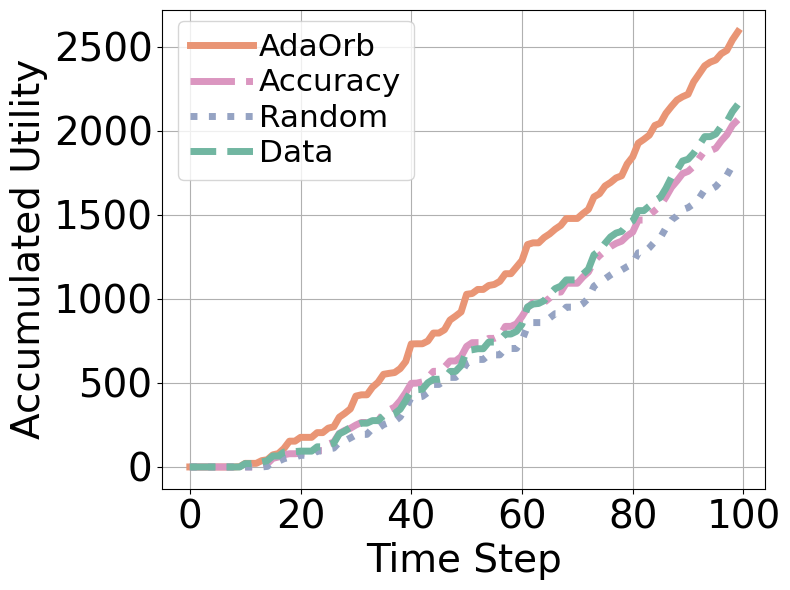

In [17]:
# plot accumulated utility over time
# each seed is a line, and the accumulated utility is the y-axis, time_step is the x-axis

fig = plt.figure(figsize=(8, 6))
font_size = 28
line_width = 5
# sort the allocation_algorithm_utility_dict by the allocation_algorithm's order in plt_config
allocation_algorithm_utility_dict = dict(sorted(allocation_algorithm_utility_dict.items(), key=lambda item: list(plt_config.keys()).index(item[0])))
print(f'allocation_algorithm_utility_dict: {allocation_algorithm_utility_dict}')
for allocation_algorithm, seed_dict in allocation_algorithm_utility_dict.items():
    for seed, utility_dict in seed_dict.items():
        accumulated_utility_list = np.cumsum(list(utility_dict.values()))
        # accumulated_utility_list = list(utility_dict.values())
        label_name = plt_config[allocation_algorithm]['label']
        color = plt_config[allocation_algorithm]['color']
        marker = plt_config[allocation_algorithm]['marker']
        linestyle = plt_config[allocation_algorithm]['linestyle']
        plt.plot(
            accumulated_utility_list, 
            label=label_name, 
            color=color, 
            # marker=marker, 
            linestyle=linestyle,
            linewidth=line_width
        )
        print("algorithm: ", allocation_algorithm, "final utility: ", accumulated_utility_list[-1])

plt.xlabel('Time Step', fontsize=font_size)
plt.ylabel('Accumulated Utility', fontsize=font_size)
# plt.title('Accumulated Utility over time')
plt.legend(fontsize=font_size*0.8, labelspacing=0.2, handletextpad=0.2, bbox_to_anchor=(0, 1.01), loc='upper left')
plt.xticks(fontsize=font_size)
plt.grid()
plt.yticks(fontsize=font_size)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, f'fig5b_accumulated_utility_over_time_{constellation}_{ground_station}.pdf'))
plt.savefig(os.path.join(fig_folder, f'fig5b_accumulated_utility_over_time_{constellation}_{ground_station}.png'))
plt.show()